In [48]:
import numpy as np
import pandas as pd
from pandas import MultiIndex, Int16Dtype
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, mean_squared_error, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as ct
from lightgbm import LGBMClassifier, LGBMRegressor, Dataset, train
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
from sklearn.feature_extraction import DictVectorizer
# import torch

In [2]:
data_train = pd.read_excel('Dataset/train_dataset_hackathon_mkb_excel.xlsx', index_col=0)
data_test = pd.read_excel('Dataset/test_dataset_hackathon_mkb_excel.xlsx', index_col=0)

In [3]:
len(data_test)

7330

In [4]:
data_train.describe()

id_client       IP_flag        TARGET         F1100         F1110  \
count  17891.000000  17891.000000  17891.000000  6.936000e+03  1.420000e+03   
mean    6630.652786      0.195629      0.413001  3.184582e+09  1.136357e+08   
std     3659.132885      0.396695      0.492387  3.062184e+10  9.413832e+08   
min        1.000000      0.000000      0.000000 -1.820000e+05  1.000000e+03   
25%     3452.000000      0.000000      0.000000  4.335000e+05  7.300000e+04   
50%     6560.000000      0.000000      0.000000  4.308000e+06  2.760000e+05   
75%    10080.000000      0.000000      1.000000  6.661650e+07  4.409500e+06   
max    12735.000000      1.000000      1.000000  1.250774e+12  1.342100e+10   

              F1150         F1160         F1170         F1180         F1190  \
count  6.341000e+03  3.460000e+02  1.499000e+03  2.500000e+03  1.520000e+03   
mean   2.287078e+09  4.981780e+07  3.389027e+09  1.341100e+08  7.205449e+08   
std    2.016291e+10  2.561433e+08  2.076766e+10  6.466805e+08  7.870709e+09   
min    1.000000e+03 -1.175000e+06  1.000000e+03 -2.540000e+05  1.000000e+03   
25%    7.180000e+05  3.694000e+06  1.130000e+05  1.720000e+05  6.737500e+05   
50%    4.984000e+06  3.694000e+06  7.239000e+06  3.907000e+06  9.011000e+06   
75%    5.594400e+07  1.195650e+07  1.485000e+08  4.848200e+07  6.554500e+07   
max    8.783281e+11  2.989645e+09  2.833230e+11  1.390180e+10  2.856253e+11   

       ...   SUM_95_YEAR  ADMITTEDNUMBER_95_EVER  NOTADMITTEDNUMBER_EVER  \
count  ...  6.331000e+03             6784.000000             6784.000000   
mean   ...  1.112049e+08              651.184699               16.176739   
std    ...  5.293399e+08             2552.512856               50.684059   
min    ...  0.000000e+00                0.000000                0.000000   
25%    ...  1.418006e+06               35.000000                0.000000   
50%    ...  7.371221e+06              136.000000                3.000000   
75%    ...  3.373519e+07              443.000000               10.000000   
max    ...  4.946254e+09            51040.000000              809.000000   

       WINNERNUMBER_95_EVER  SIGNEDNUMBER_95_EVER   SUM_95_EVER  \
count           6784.000000           6784.000000  6.784000e+03   
mean             354.557341            323.424823  2.544790e+08   
std             1339.773863           1258.815709  1.140965e+09   
min                0.000000              0.000000  0.000000e+00   
25%               17.000000             12.000000  4.296130e+06   
50%               75.000000             58.000000  1.865707e+07   
75%              219.250000            176.250000  9.359097e+07   
max            24749.000000          22821.000000  3.813102e+10   

       FLAG_DISQUALIFICATION  COUNT_CHANGE_YEAR  COUNT_CHANGE_EVER  \
count                    5.0         239.000000        1509.000000   
mean                     1.0           1.502092           2.325381   
std                      0.0           1.511509           2.316937   
min                      1.0           1.000000           1.000000   
25%                      1.0           1.000000           1.000000   
50%                      1.0           1.000000           2.000000   
75%                      1.0           2.000000           2.000000   
max                      1.0          13.000000          25.000000   

               AGE  
count  1419.000000  
mean     41.916843  
std      10.769157  
min      21.000000  
25%      32.000000  
50%      40.000000  
75%      49.000000  
max      78.000000  

[8 rows x 111 columns]

In [5]:
data_train.info(verbose=True, show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17891 entries, 1 to 17891
Data columns (total 123 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    id_client                   17891 non-null  int64  
 1    SIGN_DATE                   17891 non-null  object 
 2    IP_flag                     17891 non-null  int64  
 3    TARGET                      17891 non-null  int64  
 4    F1100                       6936 non-null   float64
 5    F1110                       1420 non-null   float64
 6    F1150                       6341 non-null   float64
 7    F1160                       346 non-null    float64
 8    F1170                       1499 non-null   float64
 9    F1180                       2500 non-null   float64
 10   F1190                       1520 non-null   float64
 11   F1200                       11850 non-null  float64
 12   F1210                       9735 non-null   float64
 13   F1220         

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

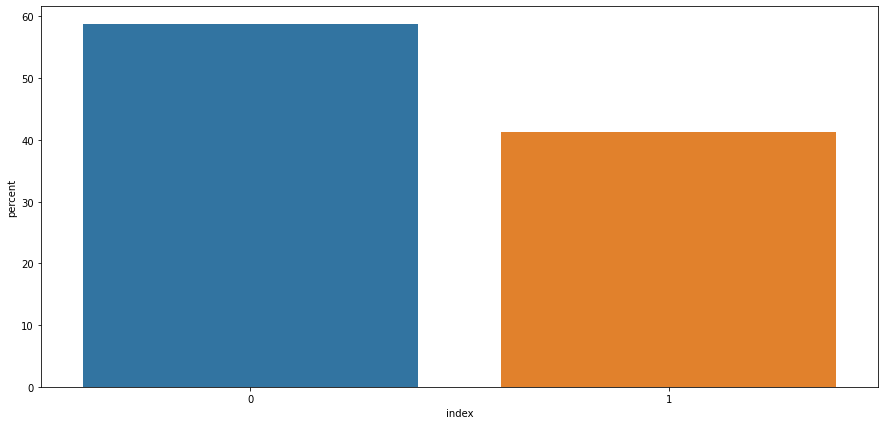

In [6]:
norm_target = (data_train.TARGET.value_counts(normalize=True).mul(100).rename('percent').reset_index())
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

In [7]:
target = data_train.TARGET
# data_train = data_train.drop('TARGET', axis =1)

In [8]:
app_float = list(filter(lambda x: data_train[x].dtypes != 'O', data_train.columns))
app_obj = list(filter(lambda x: data_train[x].dtypes == 'O', data_train.columns))

In [9]:
data_train[app_obj].info(verbose=True, show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17891 entries, 1 to 17891
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SIGN_DATE          17891 non-null  object
 1   DATEFIRSTREG       16557 non-null  object
 2   OKFS_GROUP         14391 non-null  object
 3   OKOPF_GROUP        14391 non-null  object
 4   OKOGU_GROUP        14388 non-null  object
 5   WORKERSRANGE       13911 non-null  object
 6   TAXREG_REGDATE     16554 non-null  object
 7   TAXREGPAY_REGDATE  16463 non-null  object
 8   OKVED_CODE         16692 non-null  object
 9   BIRTHDATE          1419 non-null   object
 10  SEX_NAME           2168 non-null   object
 11  CITIZENSHIP_NAME   2128 non-null   object
dtypes: object(12)
memory usage: 1.8+ MB


In [10]:
app_data = list(filter(lambda x: 'DATE' in x, app_obj)) # список всех колонок с датами
app_str = list(filter(lambda x: 'DATE' not in x, app_obj)) # список всех колонок с датами

In [11]:
data_train[app_obj].nunique()

SIGN_DATE             439
DATEFIRSTREG         4227
OKFS_GROUP              5
OKOPF_GROUP             5
OKOGU_GROUP             4
WORKERSRANGE           12
TAXREG_REGDATE       3301
TAXREGPAY_REGDATE     960
OKVED_CODE            773
BIRTHDATE             844
SEX_NAME                2
CITIZENSHIP_NAME        4
dtype: int64

In [12]:
# переводим все даты в формат даты, выделяем год
for i in app_data:
    data_train[i] = pd.to_datetime(data_train[i], format='%d%b%Y:%H:%M:%S').dt.strftime('%Y') 

In [13]:
data_train = data_train.drop('TARGET', axis =1)

In [14]:
# столбцы, где есть нулевые значения и значения числовые
app_null = list(filter(lambda x: (data_train[x].isin([0]).any() == True) and (data_train[x].dtypes != 'O') , data_train.columns))
# столбцы, где нет нулевых значений и значения числовые
app_nonull = list(filter(lambda x: (data_train[x].isin([0]).any() == False) and (data_train[x].dtypes != 'O') , data_train.columns))

In [15]:
index_data_okved = []
for i in data_train.index:
    if (type(data_train.OKVED_CODE[i]) == dt):
        index_data_okved.append(i)
for i in index_data_okved:
    data_train.OKVED_CODE.loc[i] = data_train.OKVED_CODE.loc[i].strftime('%m.%y')
    
# Оставлем только четыре значащие цифры ОКВЕД 
index_str_okved = []
for i in data_train.index:
    if  type(data_train.OKVED_CODE[i]) == str:
        index_str_okved.append(i)
for i in index_str_okved:
    data_train.OKVED_CODE.loc[i] = str(data_train.OKVED_CODE.loc[i][:5])

C:\Users\MOHAPX\AppData\Local\Temp\ipykernel_7176\2710349174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.OKVED_CODE.loc[i] = data_train.OKVED_CODE.loc[i].strftime('%m.%y')
C:\Users\MOHAPX\AppData\Local\Temp\ipykernel_7176\2710349174.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.OKVED_CODE.loc[i] = str(data_train.OKVED_CODE.loc[i][:5])


In [17]:
column_obj = []
for name in data_train.columns:
    if (data_train[name].dtypes == 'O'):
        column_obj.append(name)

In [18]:
index_obj = []
for name in column_obj:
    index_obj.append(int(data_train.columns.get_loc(name)))

In [19]:
index_obj

[1, 63, 64, 65, 66, 71, 72, 73, 84, 118, 120, 121]

In [21]:
column_obj

['SIGN_DATE',
 'DATEFIRSTREG',
 'OKFS_GROUP',
 'OKOPF_GROUP',
 'OKOGU_GROUP',
 'WORKERSRANGE',
 'TAXREG_REGDATE',
 'TAXREGPAY_REGDATE',
 'OKVED_CODE',
 'BIRTHDATE',
 'SEX_NAME',
 'CITIZENSHIP_NAME']

In [22]:
data_train[column_obj] = data_train[column_obj].fillna('unknown')

In [23]:
data_train[column_obj].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17891 entries, 1 to 17891
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SIGN_DATE          17891 non-null  object
 1   DATEFIRSTREG       17891 non-null  object
 2   OKFS_GROUP         17891 non-null  object
 3   OKOPF_GROUP        17891 non-null  object
 4   OKOGU_GROUP        17891 non-null  object
 5   WORKERSRANGE       17891 non-null  object
 6   TAXREG_REGDATE     17891 non-null  object
 7   TAXREGPAY_REGDATE  17891 non-null  object
 8   OKVED_CODE         17891 non-null  object
 9   BIRTHDATE          17891 non-null  object
 10  SEX_NAME           17891 non-null  object
 11  CITIZENSHIP_NAME   17891 non-null  object
dtypes: object(12)
memory usage: 2.3+ MB


In [27]:
#формируем выборку для контроля
df_train, df_valid, train_target, test_target = train_test_split ( 
    data_train, target, test_size = 0.2, random_state = 17)

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split ( 
    df_train, train_target, test_size = 0.22, random_state = 33) 
    
train_data  = ct.Pool(X_train,  y_train, cat_features = index_obj) 
test_data  =  ct.Pool(X_valid ,  y_valid, cat_features = index_obj)

In [42]:
params = {
    'task_type': 'GPU',
    'iterations':500,
    'learning_rate': 0.01,
    'early_stopping_rounds':20
}
model1 = ct.CatBoostClassifier(**params)

In [43]:
model1.fit(train_data,     
            eval_set=(test_data),
            verbose=False,
            use_best_model = True,
            plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [44]:
y_predict = model1.predict(df_valid)

In [45]:
auc_score = roc_auc_score(test_target, y_predict)
fpr, tpr, thresholds = roc_curve(test_target, y_predict)

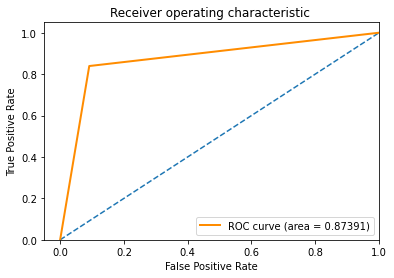

CPU times: total: 219 ms
Wall time: 244 ms


In [46]:
%%time
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, color="darkorange",
    lw=2,
    label="ROC curve (area = %0.5f)" % auc_score,
)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

In [47]:
auc_score

0.8739082832852902